In [1]:
# Machine Learning Final Project from Qizhi Zhao

In [2]:
import numpy as np
%matplotlib inline 
from sklearn import __version__ as sklearn_version
from distutils.version import LooseVersion
from IPython.display import Image 
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os

In [3]:
os.chdir('H:/ML/FP/')
file = '1.csv'
fields=['CMPLNT_FR_TM','LAW_CAT_CD','Latitude','Longitude']
df = pd.read_csv(file, skipinitialspace=True, usecols=fields)
df.tail()
print(df)

        CMPLNT_FR_TM   LAW_CAT_CD   Latitude  Longitude
0           23:45:00       FELONY  40.828848 -73.916661
1           23:36:00       FELONY  40.697338 -73.784557
2           23:30:00       FELONY  40.802607 -73.945052
3           23:30:00  MISDEMEANOR  40.654549 -73.726339
4           23:25:00  MISDEMEANOR  40.738002 -73.987891
5           23:18:00       FELONY  40.665023 -73.957111
6           23:15:00  MISDEMEANOR  40.720200 -73.988735
7           23:15:00       FELONY  40.845707 -73.910398
8           23:15:00  MISDEMEANOR  40.856711 -73.891900
9           23:10:00  MISDEMEANOR  40.765618 -73.963623
10          23:05:00  MISDEMEANOR  40.822040 -73.891732
11          23:00:00  MISDEMEANOR  40.732828 -73.986063
12          23:00:00       FELONY  40.757916 -73.989299
13          23:00:00       FELONY  40.757916 -73.989299
14          23:00:00       FELONY  40.644562 -73.927662
15          23:00:00       FELONY  40.708096 -73.782102
16          23:00:00       FELONY  40.755197 -73

In [4]:
print("Changing time column data from string to number...")
t=df.iloc[:,0]
t1 = np.zeros(shape=(5580035,1))

for x in range(t1.size):
    if (isinstance(t[x], float)):
        t1[x]=t[x]
    else:
        (h, m, s) = t[x].split(':')
        result = int(h) * 3600 + int(m) * 60 + int(s)
        t1[x]=result

print("new time")
print(t1)

Changing time column data from string to number...
new time
[[85500.]
 [84960.]
 [84600.]
 ...
 [ 1800.]
 [43200.]
 [57600.]]


In [5]:

print("now change string in level offence into number ")
t2 = np.zeros(shape=(5580035,1))
for x in range(5580035):
    if (df['LAW_CAT_CD'][x]=="FELONY"):
        t2[x]=0.99
    elif (df['LAW_CAT_CD'][x]=="MISDEMEANOR"):
        t2[x]=0.66
    else:
        t2[x]=0.33
print("new level of offese: ")
print(t2)


now change string in level offence into number 
new level of offese: 
[[0.99]
 [0.99]
 [0.99]
 ...
 [0.99]
 [0.66]
 [0.99]]


In [6]:
df['Time'] = t1
df['Offense'] = t2
print(df)
# a=np.column_stack((t1,df.iloc[:,2:4],df.iloc[:,1]))
# ab=a[np.logical_not(np.isnan(x))]
# print(ab)
# data=ab[:5384120,:]
# print("data")
# print(data)

        CMPLNT_FR_TM   LAW_CAT_CD   Latitude  Longitude     Time  Offense
0           23:45:00       FELONY  40.828848 -73.916661  85500.0     0.99
1           23:36:00       FELONY  40.697338 -73.784557  84960.0     0.99
2           23:30:00       FELONY  40.802607 -73.945052  84600.0     0.99
3           23:30:00  MISDEMEANOR  40.654549 -73.726339  84600.0     0.66
4           23:25:00  MISDEMEANOR  40.738002 -73.987891  84300.0     0.66
5           23:18:00       FELONY  40.665023 -73.957111  83880.0     0.99
6           23:15:00  MISDEMEANOR  40.720200 -73.988735  83700.0     0.66
7           23:15:00       FELONY  40.845707 -73.910398  83700.0     0.99
8           23:15:00  MISDEMEANOR  40.856711 -73.891900  83700.0     0.66
9           23:10:00  MISDEMEANOR  40.765618 -73.963623  83400.0     0.66
10          23:05:00  MISDEMEANOR  40.822040 -73.891732  83100.0     0.66
11          23:00:00  MISDEMEANOR  40.732828 -73.986063  82800.0     0.66
12          23:00:00       FELONY  40.

In [7]:
df=df.dropna()
X=df.iloc[:5384120,[2,3,4]]
y=df.iloc[:5384120,[1]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)
print('X')
print(X)
print('y')
print(y)
print('X.shape,y.shape,X_test.shape,X_train.shape,y_test.shape,y_train.shape')
print(X.shape,y.shape,X_test.shape,X_train.shape,y_test.shape,y_train.shape)

X
          Latitude  Longitude     Time
0        40.828848 -73.916661  85500.0
1        40.697338 -73.784557  84960.0
2        40.802607 -73.945052  84600.0
3        40.654549 -73.726339  84600.0
4        40.738002 -73.987891  84300.0
5        40.665023 -73.957111  83880.0
6        40.720200 -73.988735  83700.0
7        40.845707 -73.910398  83700.0
8        40.856711 -73.891900  83700.0
9        40.765618 -73.963623  83400.0
10       40.822040 -73.891732  83100.0
11       40.732828 -73.986063  82800.0
12       40.757916 -73.989299  82800.0
13       40.757916 -73.989299  82800.0
14       40.644562 -73.927662  82800.0
15       40.708096 -73.782102  82800.0
16       40.755197 -73.968296  82800.0
17       40.857924 -73.891952  82800.0
18       40.606309 -73.965133  82800.0
19       40.679499 -73.862825  82500.0
20       40.655642 -73.959863  82380.0
22       40.749307 -73.897578  82200.0
23       40.671237 -73.877222  82200.0
24       40.660258 -73.913671  81900.0
25       40.586060 -73.

In [8]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.vstack((y_train, y_test))

first 500 data ploting(take more than 5 hours for ploting all)


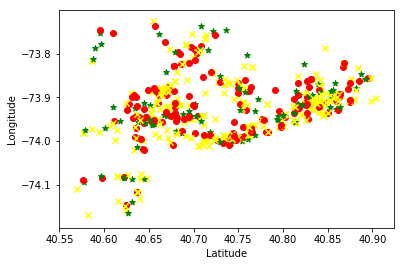

In [9]:
key_list=df['LAW_CAT_CD'].keys().tolist()
print("first 500 data ploting(take more than 5 hours for ploting all)")
for x in (key_list[0:500]):
    if (df['LAW_CAT_CD'][x]=='FELONY'):
        plt.scatter(df['Latitude'][x], X['Longitude'][x],
            color='red', marker='o')
    elif (df['LAW_CAT_CD'][x]=='MISDEMEANOR'):
        plt.scatter(df['Latitude'][x], X['Longitude'][x],
            color='yellow', marker='x')
    elif (df['LAW_CAT_CD'][x]=='VIOLATION'):
        plt.scatter(df['Latitude'][x], X['Longitude'][x],
            color='green', marker='*')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [10]:
print("------------------Part 1 Perceptron------------------")
from sklearn.linear_model import Perceptron
ppn0 = Perceptron(penalty='l1', eta0=0.1, random_state=0)
ppn0.fit(X_train_std, y_train)
print("L1 regulation perceptron accuracy is ",ppn0.score(X_combined_std, y_combined))
ppn1 = Perceptron(penalty='l2', eta0=0.1, random_state=0)
ppn1.fit(X_train_std, y_train)
print("L2 regulation perceptron accuracy is ",ppn1.score(X_combined_std, y_combined))
ppn2 = Perceptron(penalty='elasticnet', eta0=0.1, random_state=0)
ppn2.fit(X_train_std, y_train)
print("Elasticnet regulation perceptron accuracy is ",ppn2.score(X_combined_std, y_combined))
ppn3 = Perceptron(penalty='elasticnet', eta0=0.1, random_state=0)
ppn3.fit(X_train_std, y_train)
print("No regulation perceptron accuracy is ",ppn3.score(X_combined_std, y_combined))


------------------Part 1 Perceptron------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


('L1 regulation perceptron accuracy is ', 0.5680499320223175)
('L2 regulation perceptron accuracy is ', 0.4806826370883264)
('Elasticnet regulation perceptron accuracy is ', 0.4806826370883264)
('No regulation perceptron accuracy is ', 0.4806826370883264)


In [11]:
print("------------------Part 2 Regressions------------------")

df=df.dropna()
X=df.iloc[:5384120,[2,3,4]]
y=df.iloc[:5384120,[5]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)
print('X')
print(X)
print('y')
print(y)
print('X.shape,y.shape,X_test.shape,X_train.shape,y_test.shape,y_train.shape')
print(X.shape,y.shape,X_test.shape,X_train.shape,y_test.shape,y_train.shape)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.vstack((y_train, y_test))

------------------Part 2 Regressions------------------
X
          Latitude  Longitude     Time
0        40.828848 -73.916661  85500.0
1        40.697338 -73.784557  84960.0
2        40.802607 -73.945052  84600.0
3        40.654549 -73.726339  84600.0
4        40.738002 -73.987891  84300.0
5        40.665023 -73.957111  83880.0
6        40.720200 -73.988735  83700.0
7        40.845707 -73.910398  83700.0
8        40.856711 -73.891900  83700.0
9        40.765618 -73.963623  83400.0
10       40.822040 -73.891732  83100.0
11       40.732828 -73.986063  82800.0
12       40.757916 -73.989299  82800.0
13       40.757916 -73.989299  82800.0
14       40.644562 -73.927662  82800.0
15       40.708096 -73.782102  82800.0
16       40.755197 -73.968296  82800.0
17       40.857924 -73.891952  82800.0
18       40.606309 -73.965133  82800.0
19       40.679499 -73.862825  82500.0
20       40.655642 -73.959863  82380.0
22       40.749307 -73.897578  82200.0
23       40.671237 -73.877222  82200.0
24     

In [12]:
print("Linear Regression")
lr = LinearRegression()
lr.fit(X_train_std, y_train)
print("Accuracy", lr.score(X_combined_std, y_combined))

Linear Regression
('Accuracy', 0.0029648418503512852)


In [13]:
print("Ridge Regression")
rr= Ridge()
rr.fit(X_train_std, y_train)
print("Accuracy",rr.score(X_combined_std, y_combined))

Ridge Regression
('Accuracy', 0.002964841854635747)


In [14]:
# Memory error on KernelRidge Regression
# krr=KernelRidge()
# krr.fit(X_train_std, y_train)
# print("Kernelridge",krr.score(X_combined_std, y_combined))

In [15]:
print("LASSO Regressor")
lasso=Lasso()
lasso.fit(X_train_std, y_train)
print("Accuracy",lasso.score(X_combined_std, y_combined))


LASSO Regressor
('Accuracy', -1.706130614564927e-08)


In [16]:
print("ElasticNet Regressor")
ela=ElasticNet()
ela.fit(X_train_std, y_train)
print("ElasticNet",ela.score(X_combined_std, y_combined))


ElasticNet Regressor
('ElasticNet', -1.706130614564927e-08)


('DecisionTreeRegressor', 0.012222956247356143)


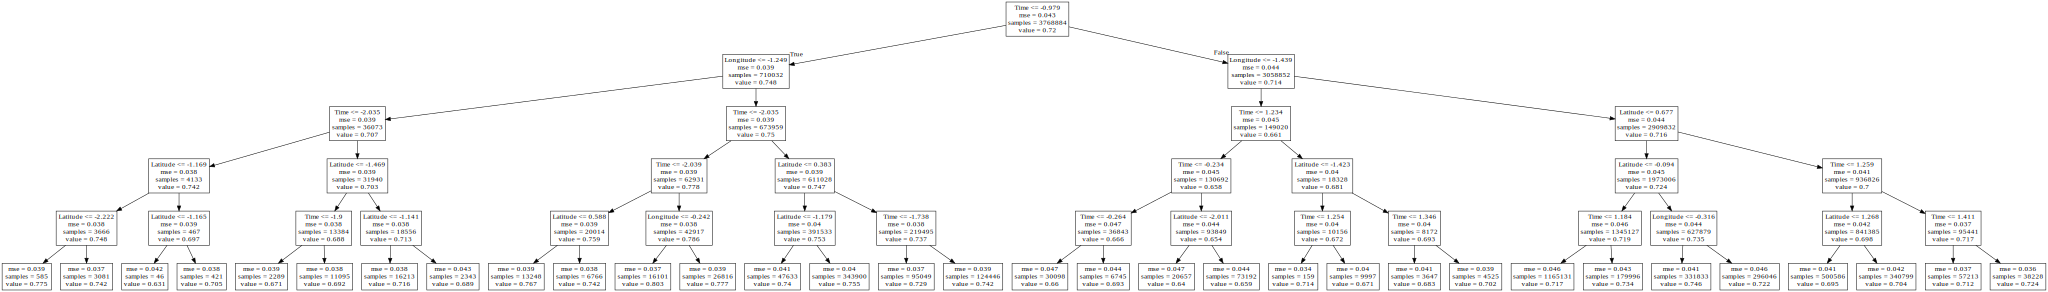

In [17]:
import graphviz
from graphviz import Digraph
from sklearn.tree import export_graphviz
tree = DecisionTreeRegressor( max_depth=5,)
tree.fit(X_train_std, y_train)

export_graphviz(tree, out_file='T2.dot', feature_names=["Latitude", "Longitude", "Time"])
print("DecisionTreeRegressor",tree.score(X_combined_std, y_combined))
with open('T2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [18]:
forest=RandomForestRegressor()
forest.fit(X_train_std, y_train)
print("RandomForestRegressor",forest.score(X_combined_std, y_combined))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('RandomForestRegressor', 0.34356636490369175)


In [19]:
from sklearn.neural_network import MLPRegressor
mlpr=MLPRegressor()
mlpr.fit(X_train_std, y_train)
print('MLPRegressor accuracy is ',mlpr.score(X_combined_std, y_combined))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


('MLPRegressor accuracy is ', 0.01049010285940033)


In [ ]:
# print("SVR with kernal function rbf")
# svr_rbf=SVR(kernel='rbf')
# svr_rbf.fit(X_train_std, y_train)
# print("Accuracy",svr.score(X_combined_std, y_combined))
# print("SVR with kernal function linear")
# svr_lin=SVR(kernel='linear')
# svr_lin.fit(X_train_std, y_train)
# print("Accuracy",svr.score(X_combined_std, y_combined))
# print("SVR with kernal function poly")
# svr_poly=SVR(kernel='poly')
# svr_poly.fit(X_train_std, y_train)
# print("Accuracy",svr.score(X_combined_std, y_combined))
# print("SVR with kernal function sigmoid")
# svr_sig=SVR(kernel='sigmoid')
# svr_sig.fit(X_train_std, y_train)
# print("Accuracy",svr.score(X_combined_std, y_combined))


print("SVR")
svr=SVR()
svr.fit(X_train_std, y_train)
print("Accuracy",svr.score(X_combined_std, y_combined))

SVR
